In [1]:
import numpy as np
import cv2
import os
from scipy import stats

# Set the path to your image folder
path = "PlantVillage/Potato___healthy"

# Initialize an empty list to store the pixel values
pixel_values = []

# Loop through all the files in the folder
for filename in os.listdir(path):
    # Load the image using OpenCV
    img = cv2.imread(os.path.join(path, filename))
    # Convert the image to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # Flatten the image to a 1D array
    pixels = gray.flatten()
    # Add the pixel values to the list
    pixel_values.extend(pixels)

# Compute the mean, median, mode, standard deviation, 25th and 75th percentile of the pixel values
mean = np.mean(pixel_values)
median = np.median(pixel_values)
mode = stats.mode(pixel_values)[0][0]
std = np.std(pixel_values)
p25 = np.percentile(pixel_values, 25)
p75 = np.percentile(pixel_values, 75)

print("Mean pixel value:", mean)
print("Median pixel value:", median)
print("Mode pixel value:", mode)
print("Standard deviation of pixel values:", std)
print("25th percentile pixel value:", p25)
print("75th percentile pixel value:", p75)


C:\Users\vivek\AppData\Local\Temp\ipykernel_21152\2690377998.py:26: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode = stats.mode(pixel_values)[0][0]


Mean pixel value: 127.86051438984119
Median pixel value: 135.0
Mode pixel value: 151
Standard deviation of pixel values: 42.653694231008764
25th percentile pixel value: 99.0
75th percentile pixel value: 160.0


This code loads and analyzes images of healthy potato plants. It uses OpenCV to read the images and converts them to grayscale. Then, it flattens the grayscale images into a 1D array and computes various descriptive statistics of the pixel values, such as mean, median, mode, standard deviation, and percentiles. These statistics give us an idea of the distribution of pixel values in the images, which can help us identify any patterns or anomalies in the data. The results of these computations are printed to the console.

In [2]:
import os
import cv2

dataset_path = "PlantVillage/Potato___healthy"
image_filenames = os.listdir(dataset_path)

min_val = float("inf")
max_val = float("-inf")

for filename in image_filenames:
    image_path = os.path.join(dataset_path, filename)
    image = cv2.imread(image_path)
    image_min = image.min()
    image_max = image.max()
    
    if image_min < min_val:
        min_val = image_min
        
    if image_max > max_val:
        max_val = image_max
        
print("Minimum pixel value: ", min_val)
print("Maximum pixel value: ", max_val)


Minimum pixel value:  0
Maximum pixel value:  255


This code loads images from a specified directory and calculates the minimum and maximum pixel values across all images. The os module is used to list all files in the directory and the cv2 module is used to load each image.

The min_val and max_val variables are initialized to positive and negative infinity, respectively, to ensure that they are updated with the first image's minimum and maximum values. The image.min() and image.max() functions are used to calculate the minimum and maximum pixel values in each image. If a new minimum or maximum value is found, it is updated in the min_val and max_val variables, respectively.

The final output displays the minimum and maximum pixel values across all images in the specified directory.

Overall, this code provides a quick way to get an idea of the range of pixel values in a dataset of images.

Skewness: -0.49, Type: Negative skew
Kurtosis: -0.30, Type: Platykurtic


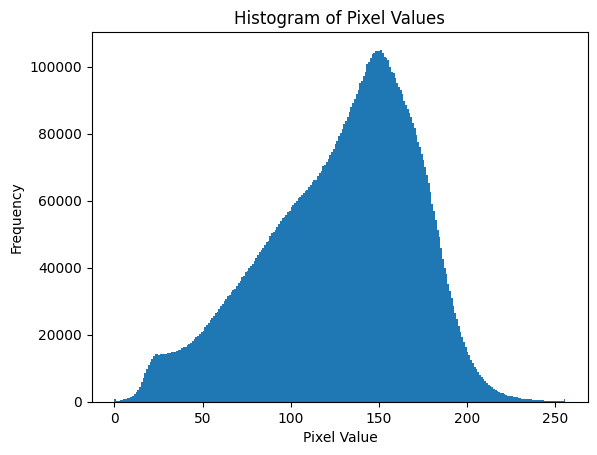

In [3]:
import os
import cv2
import matplotlib.pyplot as plt
import scipy.stats as stats

dataset_path = "PlantVillage/Potato___healthy"
image_filenames = os.listdir(dataset_path)

histogram = []

for filename in image_filenames:
    image_path = os.path.join(dataset_path, filename)
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    histogram += list(image.flatten())

plt.hist(histogram, bins=256, range=[0, 256])
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.title('Histogram of Pixel Values')

# Compute skewness, kurtosis, type of skewness and type of kurtosis
skewness = stats.skew(histogram)
kurtosis = stats.kurtosis(histogram)
if skewness > 0:
    skew_type = "Positive skew"
elif skewness < 0:
    skew_type = "Negative skew"
else:
    skew_type = "No skew"
if kurtosis > 3:
    kurtosis_type = "Leptokurtic"
elif kurtosis < 3:
    kurtosis_type = "Platykurtic"
else:
    kurtosis_type = "Mesokurtic"
    
print("Skewness: {:.2f}, Type: {}".format(skewness, skew_type))
print("Kurtosis: {:.2f}, Type: {}".format(kurtosis, kurtosis_type))
plt.show()


This code computes and visualizes the histogram of pixel values in a set of images from the PlantVillage dataset. It also calculates some statistics related to the distribution of pixel values, including skewness and kurtosis, and classifies the type of skewness and kurtosis based on their values.

The code loops through all the image files in a folder and reads them using OpenCV's cv2.imread function. It converts each image to grayscale and flattens it to a 1D array of pixel values using the flatten method. The pixel values are then appended to a list called histogram.

The code then plots a histogram of the pixel values using matplotlib.pyplot.hist. It sets the number of bins to 256 and the range to [0, 256], which corresponds to the range of grayscale pixel values.

Finally, the code computes the skewness and kurtosis of the pixel value distribution using the scipy.stats.skew and scipy.stats.kurtosis functions. It then classifies the type of skewness and kurtosis based on their values and prints the results. The code then shows the histogram using matplotlib.pyplot.show.

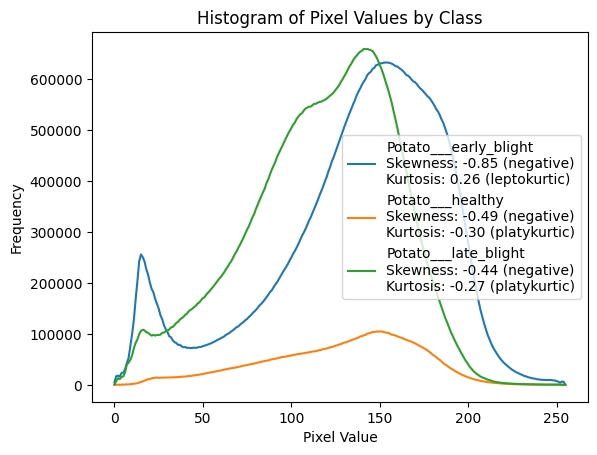

In [19]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis

# Set the path to the "potato" folder in the PlantVillage dataset
path = "PlantVillage"

# Define the classes (subfolders) to visualize
classes = ["Potato___Early_blight", "Potato___healthy", "Potato___Late_blight"]

# Loop through each class and compute the histogram of pixel values
for c in classes:
    # Initialize an empty list to store the pixel values
    pixel_values = []
    
    # Loop through all the files in the class folder
    for filename in os.listdir(os.path.join(path, c)):
        # Load the image using OpenCV
        img = cv2.imread(os.path.join(path, c, filename))
        # Convert the image to grayscale
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        # Flatten the image to a 1D array
        pixels = gray.flatten()
        # Add the pixel values to the list
        pixel_values.extend(pixels)
    
    # Compute the histogram of pixel values
    hist, bins = np.histogram(pixel_values, bins=256, range=[0, 256])
    
    # Compute skewness and kurtosis
    skewness = skew(pixel_values)
    kurt = kurtosis(pixel_values)
    if skewness < 0:
        skew_type = "negative"
    elif skewness == 0:
        skew_type = "zero"
    else:
        skew_type = "positive"
    if kurt < 0:
        kurt_type = "platykurtic"
    elif kurt == 0:
        kurt_type = "mesokurtic"
    else:
        kurt_type = "leptokurtic"
    
    # Plot the histogram
    plt.plot(bins[:-1], hist, label=f"{c}\nSkewness: {skewness:.2f} ({skew_type})\nKurtosis: {kurt:.2f} ({kurt_type})")
    
# Add labels and legend to the plot
plt.title("Histogram of Pixel Values by Class")
plt.xlabel("Pixel Value")
plt.ylabel("Frequency")
plt.legend()

# Display the plot
plt.show()


This code reads images from the PlantVillage dataset, specifically from the subfolders "Potato___early_blight", "Potato___healthy", and "Potato___late_blight", and creates a histogram of pixel values for each class. The histogram is plotted using Matplotlib, with each class having a different color and label.

For each class, the code loops through all the image files in the class folder and loads them using OpenCV. The images are then converted to grayscale and flattened into a 1D array. The pixel values are added to a list, and the histogram of pixel values is computed using the NumPy function histogram.

The code also calculates the skewness and kurtosis of the pixel values using the skew and kurtosis functions from SciPy. Skewness measures the asymmetry of the distribution, with positive skewness indicating a longer tail on the right and negative skewness indicating a longer tail on the left. Kurtosis measures the peakedness of the distribution, with leptokurtic distributions having a sharper peak and platykurtic distributions having a flatter peak. The skewness and kurtosis values, along with their type, are printed on the plot as well.

Overall, the code provides a useful visualization of the pixel value distribution for each class in the dataset and provides additional information on the skewness and kurtosis of the distributions.

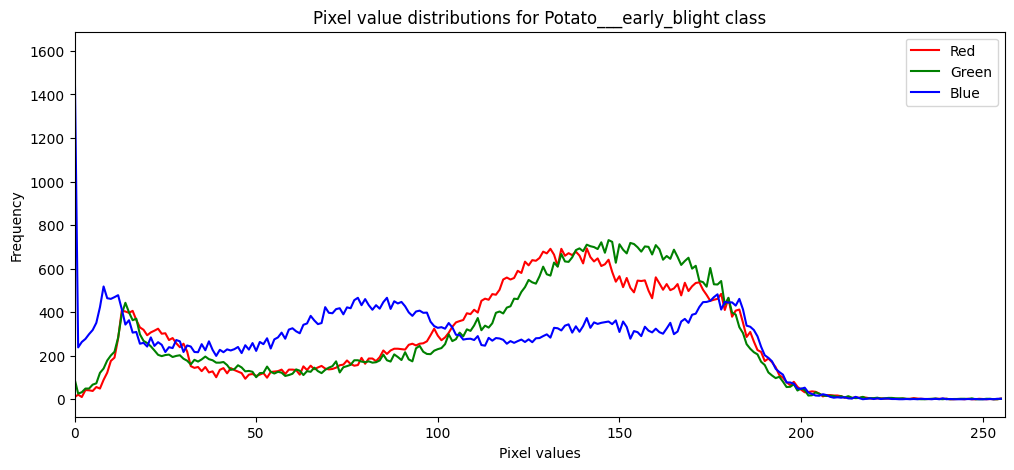

In [4]:
import cv2
import os
from matplotlib import pyplot as plt

# Set the path to your image folder
# path = "PlantVillage/Potato___healthy" 
path = "PlantVillage/Potato___Early_blight"
# Initialize an empty list to store the pixel values
pixel_values = []

# Loop through all the files in the folder
for filename in os.listdir(path):
    # Load the image using OpenCV
    img = cv2.imread(os.path.join(path,filename))
    # Split the image into its Red, Green, and Blue channels
    b, g, r = cv2.split(img)
    # Calculate the histograms for each color channel
    hist_r = cv2.calcHist([r], [0], None, [256], [0, 256])
    hist_g = cv2.calcHist([g], [0], None, [256], [0, 256])
    hist_b = cv2.calcHist([b], [0], None, [256], [0, 256])
    # Add the pixel values to the list
    pixel_values.append((hist_r, hist_g, hist_b))

# Plot the histograms for each color channel
plt.figure(figsize=(12, 5))
plt.title('Pixel value distributions for Potato___early_blight class')
plt.xlabel('Pixel values')
plt.ylabel('Frequency')
plt.xlim([0, 256])
colors = ['r', 'g', 'b']
labels = ['Red', 'Green', 'Blue']
for i in range(3):
    plt.plot(pixel_values[0][i], color=colors[i], label=labels[i])
plt.legend()
plt.show()


This code computes and plots the histograms of the RGB color channels for a set of images in a specified folder. Here are some comprehensive remarks for the code:

Import necessary libraries: The code starts by importing the required libraries, including cv2, os, and pyplot from the matplotlib library.

Set the path: The code sets the path to the image folder that contains the images for which we want to compute the histograms.

Loop through the images: The code loops through all the images in the specified folder using os.listdir(). For each image, it reads the image using cv2.imread(), splits it into its RGB channels using cv2.split(), and calculates the histograms for each color channel using cv2.calcHist(). The histograms for each color channel are stored in a list called pixel_values.

Plot the histograms: The code plots the histograms for each color channel using pyplot.plot(). It sets the figure size, title, and axis labels. The color of each channel's histogram is set using the colors list, and the label for each channel is set using the labels list. Finally, the legend is added to the plot using pyplot.legend().

Overall, It is a useful way to visualize the color distributions in a set of images, which can help with tasks such as color-based image segmentation and object recognition.

Red channel:
Minimum pixel value: 2.0
Maximum pixel value: 1062.0
Skewness: 1.71 (Positive skew)
Kurtosis: 3.85 (Leptokurtic kurtosis)

Green channel:
Minimum pixel value: 0.0
Maximum pixel value: 1201.0
Skewness: 1.66 (Positive skew)
Kurtosis: 2.43 (Platykurtic kurtosis)

Blue channel:
Minimum pixel value: 0.0
Maximum pixel value: 1119.0
Skewness: 1.41 (Positive skew)
Kurtosis: 2.94 (Platykurtic kurtosis)



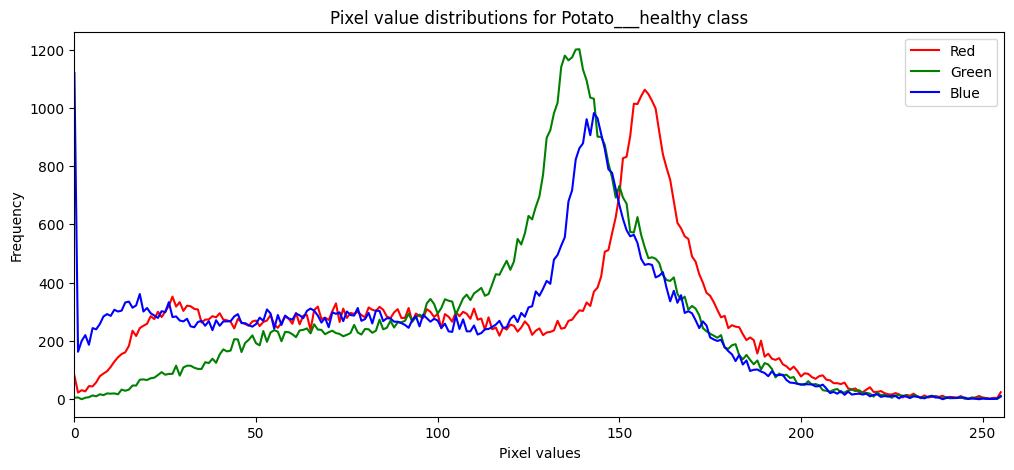

In [31]:
import cv2
import os
from matplotlib import pyplot as plt

# Set the path to your image folder
path = "PlantVillage/Potato___healthy"

# Initialize an empty list to store the pixel values
pixel_values = []

# Loop through all the files in the folder
for filename in os.listdir(path):
    # Load the image using OpenCV
    img = cv2.imread(os.path.join(path,filename))
    # Split the image into its Red, Green, and Blue channels
    b, g, r = cv2.split(img)
    # Calculate the histograms for each color channel
    hist_r = cv2.calcHist([r], [0], None, [256], [0, 256])
    hist_g = cv2.calcHist([g], [0], None, [256], [0, 256])
    hist_b = cv2.calcHist([b], [0], None, [256], [0, 256])
    # Add the pixel values to the list
    pixel_values.append((hist_r, hist_g, hist_b))

# Plot the histograms for each color channel
plt.figure(figsize=(12, 5))
plt.title('Pixel value distributions for Potato___healthy class')
plt.xlabel('Pixel values')
plt.ylabel('Frequency')
plt.xlim([0, 256])
colors = ['r', 'g', 'b']
labels = ['Red', 'Green', 'Blue']
for i in range(3):
    hist_list = pixel_values[0][i].flatten()
    min_val = np.min(hist_list)
    max_val = np.max(hist_list)
    skewness = stats.skew(hist_list)
    kurt = stats.kurtosis(hist_list)
    if skewness < 0:
        skew_type = 'Negative'
    elif skewness > 0:
        skew_type = 'Positive'
    else:
        skew_type = 'None'
    if kurt < 3:
        kurt_type = 'Platykurtic'
    elif kurt > 3:
        kurt_type = 'Leptokurtic'
    else:
        kurt_type = 'Mesokurtic'
    color = labels[i]
    print(f"{color} channel:")
    print(f"Minimum pixel value: {min_val}")
    print(f"Maximum pixel value: {max_val}")
    print(f"Skewness: {skewness:.2f} ({skew_type} skew)")
    print(f"Kurtosis: {kurt:.2f} ({kurt_type} kurtosis)\n")
    plt.plot(hist_list, color=colors[i], label=labels[i])
plt.legend()
plt.show()

**Following code does same as the above except for it does it on the Potato___late_blight folder**

Red channel:
Minimum pixel value: 0.0
Maximum pixel value: 1392.0
Skewness: 1.63 (Positive skew)
Kurtosis: 1.95 (Platykurtic kurtosis)

Green channel:
Minimum pixel value: 0.0
Maximum pixel value: 1242.0
Skewness: 1.28 (Positive skew)
Kurtosis: 0.31 (Platykurtic kurtosis)

Blue channel:
Minimum pixel value: 0.0
Maximum pixel value: 1220.0
Skewness: 1.33 (Positive skew)
Kurtosis: 0.98 (Platykurtic kurtosis)



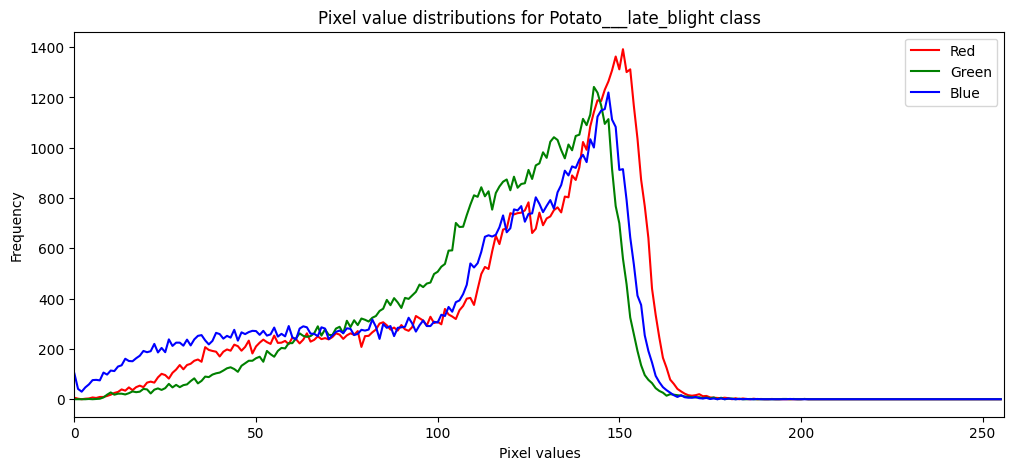

In [30]:
import cv2
import os
from matplotlib import pyplot as plt

# Set the path to your image folder
path = "PlantVillage/Potato___late_blight"

# Initialize an empty list to store the pixel values
pixel_values = []

# Loop through all the files in the folder
for filename in os.listdir(path):
    # Load the image using OpenCV
    img = cv2.imread(os.path.join(path,filename))
    # Split the image into its Red, Green, and Blue channels
    b, g, r = cv2.split(img)
    # Calculate the histograms for each color channel
    hist_r = cv2.calcHist([r], [0], None, [256], [0, 256])
    hist_g = cv2.calcHist([g], [0], None, [256], [0, 256])
    hist_b = cv2.calcHist([b], [0], None, [256], [0, 256])
    # Add the pixel values to the list
    pixel_values.append((hist_r, hist_g, hist_b))

# Plot the histograms for each color channel
plt.figure(figsize=(12, 5))
plt.title('Pixel value distributions for Potato___late_blight class')
plt.xlabel('Pixel values')
plt.ylabel('Frequency')
plt.xlim([0, 256])
colors = ['r', 'g', 'b']
labels = ['Red', 'Green', 'Blue']
for i in range(3):
    hist_list = pixel_values[0][i].flatten()
    min_val = np.min(hist_list)
    max_val = np.max(hist_list)
    skewness = stats.skew(hist_list)
    kurt = stats.kurtosis(hist_list)
    if skewness < 0:
        skew_type = 'Negative'
    elif skewness > 0:
        skew_type = 'Positive'
    else:
        skew_type = 'None'
    if kurt < 3:
        kurt_type = 'Platykurtic'
    elif kurt > 3:
        kurt_type = 'Leptokurtic'
    else:
        kurt_type = 'Mesokurtic'
    color = labels[i]
    print(f"{color} channel:")
    print(f"Minimum pixel value: {min_val}")
    print(f"Maximum pixel value: {max_val}")
    print(f"Skewness: {skewness:.2f} ({skew_type} skew)")
    print(f"Kurtosis: {kurt:.2f} ({kurt_type} kurtosis)\n")
    plt.plot(hist_list, color=colors[i], label=labels[i])
plt.legend()
plt.show()


**Following code does same as the above except for it does it on the Potato___early_blight folder**

Red channel:
Minimum pixel value: 0.0
Maximum pixel value: 693.0
Skewness: 0.49 (Positive skew)
Kurtosis: -1.08 (Platykurtic kurtosis)

Green channel:
Minimum pixel value: 0.0
Maximum pixel value: 731.0
Skewness: 0.75 (Positive skew)
Kurtosis: -0.76 (Platykurtic kurtosis)

Blue channel:
Minimum pixel value: 0.0
Maximum pixel value: 1608.0
Skewness: 1.44 (Positive skew)
Kurtosis: 13.03 (Leptokurtic kurtosis)



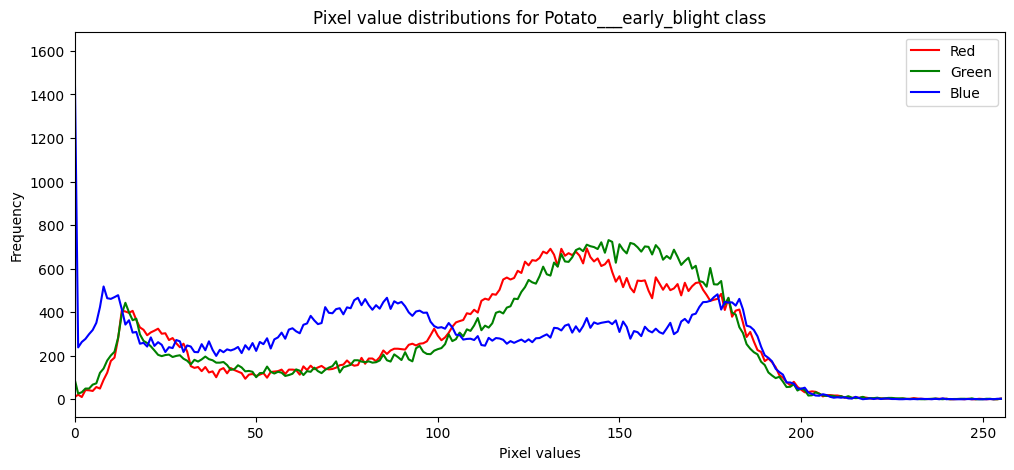

In [29]:
import cv2
import os
from scipy import stats
import numpy as np
from matplotlib import pyplot as plt

# Set the path to your image folder
# path = "PlantVillage/Potato___healthy" 
path = "PlantVillage/Potato___early_blight"
# Initialize an empty list to store the pixel values
pixel_values = []

# Loop through all the files in the folder
for filename in os.listdir(path):
    # Load the image using OpenCV
    img = cv2.imread(os.path.join(path,filename))
    # Split the image into its Red, Green, and Blue channels
    b, g, r = cv2.split(img)
    # Calculate the histograms for each color channel
    hist_r = cv2.calcHist([r], [0], None, [256], [0, 256])
    hist_g = cv2.calcHist([g], [0], None, [256], [0, 256])
    hist_b = cv2.calcHist([b], [0], None, [256], [0, 256])
    # Add the pixel values to the list
    pixel_values.append((hist_r, hist_g, hist_b))

# Plot the histograms for each color channel
plt.figure(figsize=(12, 5))
plt.title('Pixel value distributions for Potato___early_blight class')
plt.xlabel('Pixel values')
plt.ylabel('Frequency')
plt.xlim([0, 256])
colors = ['r', 'g', 'b']
labels = ['Red', 'Green', 'Blue']
for i in range(3):
    hist_list = pixel_values[0][i].flatten()
    min_val = np.min(hist_list)
    max_val = np.max(hist_list)
    skewness = stats.skew(hist_list)
    kurt = stats.kurtosis(hist_list)
    if skewness < 0:
        skew_type = 'Negative'
    elif skewness > 0:
        skew_type = 'Positive'
    else:
        skew_type = 'None'
    if kurt < 3:
        kurt_type = 'Platykurtic'
    elif kurt > 3:
        kurt_type = 'Leptokurtic'
    else:
        kurt_type = 'Mesokurtic'
    color = labels[i]
    print(f"{color} channel:")
    print(f"Minimum pixel value: {min_val}")
    print(f"Maximum pixel value: {max_val}")
    print(f"Skewness: {skewness:.2f} ({skew_type} skew)")
    print(f"Kurtosis: {kurt:.2f} ({kurt_type} kurtosis)\n")
    plt.plot(hist_list, color=colors[i], label=labels[i])
plt.legend()
plt.show()


## Feature extraction Related data analysis

In [34]:
import skimage
from skimage.feature import hog

# Load image
image = skimage.io.imread('PlantVillage/Potato___Early_blight/0a8a68ee-f587-4dea-beec-79d02e7d3fa4___RS_Early.B 8461.JPG')

# Convert to grayscale
gray_image = skimage.color.rgb2gray(image)

# Compute HOG features
hog_features = hog(gray_image, block_norm='L2-Hys', pixels_per_cell=(16, 16), cells_per_block=(2, 2), orientations=9)

print(hog_features)


[0.15267959 0.11124847 0.12307149 ... 0.0719625  0.06413624 0.08258989]


This code is using the scikit-image library to compute Histogram of Oriented Gradient (HOG) features for an image of a potato plant with early blight. Here are some comments on the code:

skimage: This is the main package for scikit-image library.


skimage.feature: This submodule contains a number of feature extraction methods including HOG.


hog(): This function computes HOG features for a given image. It takes a grayscale image as input and returns a 1D numpy array of HOG features.


gray_image: This is the grayscale version of the original image loaded using skimage.color.rgb2gray().


block_norm: This parameter specifies the normalization method used for the HOG blocks. Here, L2-Hys normalization is used.

pixels_per_cell: This parameter specifies the size of the cell in which the gradient information is computed. Here, each cell is 16x16 pixels.


cells_per_block: This parameter specifies the number of cells per block used for normalization. Here, each block contains 2x2 cells.


orientations: This parameter specifies the number of orientation bins used in the histogram of gradient orientations. Here, 9 bins are used.


hog_features: This variable stores the computed HOG features for the input image.


print(hog_features): This line prints out the computed HOG features to the console.

In [5]:
import os
import cv2
from skimage.feature import hog

# Define HOG parameters
orientations = 9
pixels_per_cell = (8, 8)
cells_per_block = (3, 3)
visualize = False
transform_sqrt = False
feature_vector = True

# Define directory containing images
directory = 'PlantVillage/Potato___Early_blight'

# Loop over all images in directory
for filename in os.listdir(directory):
    if filename.endswith('.JPG'):
        # Load image
        img = cv2.imread(os.path.join(directory, filename))

        # Convert image to grayscale
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

        # Extract HOG features
        features = hog(gray, orientations=orientations,
                       pixels_per_cell=pixels_per_cell,
                       cells_per_block=cells_per_block,
                       visualize=visualize,
                       transform_sqrt=transform_sqrt,
                       feature_vector=feature_vector)

        # Do something with the feature vector (e.g., save it to a file or use it for classification)
        print(features)


[0.20478081 0.11439083 0.09441496 ... 0.03494457 0.04574643 0.03318576]
[0.11542567 0.01251161 0.01187498 ... 0.0322608  0.01553463 0.01776005]
[0.0816137  0.02942035 0.02202653 ... 0.01042236 0.03078926 0.01279338]
[0.1158415  0.07073667 0.07906215 ... 0.02711887 0.0315311  0.04518749]
[0.11527225 0.08146727 0.068774   ... 0.14738427 0.04948151 0.04198541]
[0.13948202 0.06226814 0.17659854 ... 0.03483411 0.03780919 0.08197002]
[0.11046375 0.06575204 0.18544327 ... 0.09806066 0.05594896 0.11991585]
[0.08023692 0.03060869 0.03902618 ... 0.08133629 0.01590168 0.03796393]
[0.1622341  0.06698368 0.03685451 ... 0.06541674 0.06666833 0.01774482]
[0.11531348 0.07257067 0.061962   ... 0.03332803 0.06660496 0.02298617]
[0.10493299 0.07671931 0.05876499 ... 0.05649012 0.10232316 0.09898197]
[0.13972844 0.01378089 0.0187247  ... 0.05798037 0.0740528  0.0391319 ]
[0.08974265 0.04013746 0.08662523 ... 0.07575187 0.00694521 0.04661449]
[0.14597755 0.05535658 0.04464649 ... 0.04177314 0.02483596 0.06

This code defines the HOG parameters, loads images from a directory, extracts HOG features from each image using the hog() function from the skimage.feature module, and prints the resulting feature vector for each image.



The hog() function calculates the Histogram of Oriented Gradients (HOG) features for an image. The HOG feature descriptor is commonly used in computer vision and image processing for object detection and recognition.


The HOG parameters are defined at the beginning of the code and control various aspects of the HOG feature extraction process, such as the number of orientation bins (orientations), the size of the cells used for feature calculation (pixels_per_cell), and the number of cells per block (cells_per_block).


The os.listdir() function is used to loop over all images in the directory specified by directory, and the if filename.endswith('.jpg') statement ensures that only image files with the extension ".jpg" are processed.


For each image, the cv2.imread() function is used to read the image into memory, and cv2.cvtColor() is used to convert the image to grayscale. The resulting grayscale image is then passed to the hog() function to extract the HOG features.


Finally, the resulting feature vector is printed to the console. However, in practice, this feature vector could be used for various tasks, such as image classification or object detection.

**Following does the same as the above code except that it does for Potato___healthy**

In [43]:
import os
import cv2
from skimage.feature import hog

# Define HOG parameters
orientations = 9
pixels_per_cell = (8, 8)
cells_per_block = (3, 3)
visualize = False
transform_sqrt = False
feature_vector = True

# Define directory containing images
directory = 'PlantVillage/Potato___healthy'

# Loop over all images in directory
for filename in os.listdir(directory):
    if filename.endswith('.JPG'):
        file_path = os.path.join(directory, filename)
        if os.path.isfile(file_path):
            print(f"Processing {filename}...")
            # Load image
            img = cv2.imread(file_path)

            # Convert image to grayscale
            gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

            # Extract HOG features
            features = hog(gray, orientations=orientations,
                           pixels_per_cell=pixels_per_cell,
                           cells_per_block=cells_per_block,
                           visualize=visualize,
                           transform_sqrt=transform_sqrt,
                           feature_vector=feature_vector)

            # Do something with the feature vector (e.g., save it to a file or use it for classification)
            print(features)
        else:
            print(f"{filename} is not a file.")


Processing 00fc2ee5-729f-4757-8aeb-65c3355874f2___RS_HL 1864.JPG...
[0.17529168 0.09690086 0.0714127  ... 0.04558179 0.05416013 0.00555152]
Processing 03da9931-e514-4cc7-b04a-8f474a133ce5___RS_HL 1830.JPG...
[0.11682143 0.03737405 0.03829002 ... 0.05172948 0.0151483  0.05885024]
Processing 04481ca2-f94c-457e-b785-1ac05800b7ec___RS_HL 1930.JPG...
[0.18472689 0.0909791  0.07636634 ... 0.12427814 0.14830035 0.18782039]
Processing 046641c1-f837-49eb-b5f2-4109910a027c___RS_HL 1878.JPG...
[0.14403731 0.08509993 0.06114387 ... 0.05242066 0.06779496 0.04084008]
Processing 07dfb451-4378-49d1-b699-33a5fc49ff07___RS_HL 5399.JPG...
[0.0944203  0.08650259 0.05019167 ... 0.06854016 0.10883089 0.07576682]
Processing 0b3e5032-8ae8-49ac-8157-a1cac3df01dd___RS_HL 1817.JPG...
[0.13400049 0.03109255 0.09878652 ... 0.10303901 0.03547102 0.10606828]
Processing 0be9d721-82f5-42c3-b535-7494afe01dbe___RS_HL 1814.JPG...
[0.16339333 0.05348499 0.13030972 ... 0.04682092 0.10431155 0.07135651]
Processing 0f4ebc5a-

**Following code extracts the features for 3 folders at once ['PlantVillage/Potato___healthy',
               'PlantVillage/Potato___Early_blight',
               'PlantVillage/Potato___Late_blight']**

In [44]:
import os
import cv2
from skimage.feature import hog

# Define HOG parameters
orientations = 9
pixels_per_cell = (8, 8)
cells_per_block = (3, 3)
visualize = False
transform_sqrt = False
feature_vector = True

# Define directories containing images
directories = ['PlantVillage/Potato___healthy',
               'PlantVillage/Potato___Early_blight',
               'PlantVillage/Potato___Late_blight']

for directory in directories:
    # Loop over all images in directory
    for filename in os.listdir(directory):
        if filename.endswith('.JPG'):
            # Load image
            img = cv2.imread(os.path.join(directory, filename))

            # Convert image to grayscale
            gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

            # Extract HOG features
            features = hog(gray, orientations=orientations,
                           pixels_per_cell=pixels_per_cell,
                           cells_per_block=cells_per_block,
                           visualize=visualize,
                           transform_sqrt=transform_sqrt,
                           feature_vector=feature_vector)

            # Do something with the feature vector (e.g., save it to a file or use it for classification)
            print(features)


[0.17529168 0.09690086 0.0714127  ... 0.04558179 0.05416013 0.00555152]
[0.11682143 0.03737405 0.03829002 ... 0.05172948 0.0151483  0.05885024]
[0.18472689 0.0909791  0.07636634 ... 0.12427814 0.14830035 0.18782039]
[0.14403731 0.08509993 0.06114387 ... 0.05242066 0.06779496 0.04084008]
[0.0944203  0.08650259 0.05019167 ... 0.06854016 0.10883089 0.07576682]
[0.13400049 0.03109255 0.09878652 ... 0.10303901 0.03547102 0.10606828]
[0.16339333 0.05348499 0.13030972 ... 0.04682092 0.10431155 0.07135651]
[0.15059565 0.05469722 0.03241707 ... 0.02021592 0.         0.04377676]
[0.20211856 0.06170772 0.02080551 ... 0.11463736 0.02869676 0.15149617]
[0.15187834 0.03438113 0.04598574 ... 0.04263066 0.04615159 0.10917937]
[0.12906773 0.04801599 0.04410787 ... 0.03281442 0.10052467 0.13187943]
[0.15849536 0.16113644 0.08049081 ... 0.07158108 0.135633   0.13465598]
[0.13189959 0.04842331 0.07022874 ... 0.10905313 0.06794296 0.0401954 ]
[0.16283218 0.12568688 0.07775528 ... 0.06796749 0.04607985 0.00

**For the extrated fetures from the above code, the following code tries to find basic data descritpiton and then plot the histogram along wiht skewness and kurtosis, due to too much computational time this wasnt done successfully(more than 10 minutes)**

In [51]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis
from skimage.feature import hog

# Define HOG parameters
orientations = 9
pixels_per_cell = (8, 8)
cells_per_block = (3, 3)
visualize = False
transform_sqrt = False
feature_vector = True

# Define directory containing images
directory = 'PlantVillage/Potato___Early_blight'

# Initialize empty list to store feature vectors
feature_vectors = []

# Loop over all images in directory
for filename in os.listdir(directory):
    if filename.endswith('.JPG'):
        # Load image
        img = cv2.imread(os.path.join(directory, filename))

        # Convert image to grayscale
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

        # Extract HOG features
        features = hog(gray, orientations=orientations,
                       pixels_per_cell=pixels_per_cell,
                       cells_per_block=cells_per_block,
                       visualize=visualize,
                       transform_sqrt=transform_sqrt,
                       feature_vector=feature_vector)

        # Add feature vector to list
        feature_vectors.append(features)

# Convert feature vector list to numpy array
feature_vectors = np.array(feature_vectors)

# Calculate skewness and kurtosis of feature vector
skewness = skew(feature_vectors)
kurtosis = kurtosis(feature_vectors)

# Print statistics
print(f"Min value: {np.min(feature_vectors)}")
print(f"Max value: {np.max(feature_vectors)}")
print(f"Variance: {np.var(feature_vectors)}")

# Plot histogram of feature vector
plt.hist(feature_vectors, bins=50, density=True)
plt.title("HOG Feature Distribution")
plt.xlabel("Feature Value")
plt.ylabel("Density")
plt.show()

# Print skewness and kurtosis values along with their types
for i in range(len(skewness)):
    if skewness[i] < 0:
        skewness_type = 'Negative'
    elif skewness[i] > 0:
        skewness_type = 'Positive'
    else:
        skewness_type = 'Zero'
    if kurtosis[i] < 0:
        kurtosis_type = 'Platykurtic'
    elif kurtosis[i] > 0:
        kurtosis_type = 'Leptokurtic'
    else:
        kurtosis_type = 'Mesokurtic'
    print(f"Skewness ({skewness_type}): {skewness[i]}")
    print(f"Kurtosis ({kurtosis_type}): {kurtosis[i]}")


Min value: 0.0
Max value: 0.8899336744040753
Variance: 0.003285621066020828


KeyboardInterrupt: 

Error in callback <function _draw_all_if_interactive at 0x000002DFEA5160E0> (for post_execute):


KeyboardInterrupt: 

**Due to huge computational requirements, We could not do the data analysis part on the extracted HOG features. we stopped in between as the code seem to run for more than 10 minutes on a system with 4gb rtx nvidia graphics card with 16gb ram**

**Trying to print density plot since its faster to plot compared to histogram using seaborn, but this too ended up taking too long time due to huge data to be processed**

In [2]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis
from skimage.feature import hog

# Define HOG parameters
orientations = 9
pixels_per_cell = (8, 8)
cells_per_block = (3, 3)
visualize = False
transform_sqrt = False
feature_vector = True

# Define directory containing images
directory = 'PlantVillage/Potato___Early_blight'

# Initialize empty list to store feature vectors
feature_vectors = []

# Loop over all images in directory
for filename in os.listdir(directory):
    if filename.endswith('.JPG'):
        # Load image
        img = cv2.imread(os.path.join(directory, filename))

        # Convert image to grayscale
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

        # Extract HOG features
        features = hog(gray, orientations=orientations,
                       pixels_per_cell=pixels_per_cell,
                       cells_per_block=cells_per_block,
                       visualize=visualize,
                       transform_sqrt=transform_sqrt,
                       feature_vector=feature_vector)

        # Add feature vector to list
        feature_vectors.append(features)

# Convert feature vector list to numpy array
feature_vectors = np.array(feature_vectors)

# Calculate skewness and kurtosis of feature vector
skewness = skew(feature_vectors)
kurtosis = kurtosis(feature_vectors)

# Print statistics
print(f"Min value: {np.min(feature_vectors)}")
print(f"Max value: {np.max(feature_vectors)}")
print(f"Variance: {np.var(feature_vectors)}")

# Plot density plot of feature vector
plt.figure()
plt.title("HOG Feature Distribution")
plt.xlabel("Feature Value")
plt.ylabel("Density")
plt.hist(feature_vectors, bins=50, density=True, alpha=0.5)
feature_vectors_flat = feature_vectors.flatten()
xmin, xmax = feature_vectors_flat.min(), feature_vectors_flat.max()
x = np.linspace(xmin, xmax, 100)
p = np.zeros_like(x)
for value in feature_vectors_flat:
    idx = np.argmin(np.abs(x - value))
    p[idx] += 1
p /= p.sum()*(x[1]-x[0])
plt.plot(x, p, '-r')
plt.show()

# Print skewness and kurtosis values along with their types
for i in range(len(skewness)):
    if skewness[i] < 0:
        skewness_type = 'Negative'
    elif skewness[i] > 0:
        skewness_type = 'Positive'
    else:
        skewness_type = 'Zero'
    if kurtosis[i] < 0:
        kurtosis_type = 'Platykurtic'
    elif kurtosis[i] > 0:
        kurtosis_type = 'Leptokurtic'
    else:
        kurtosis_type = 'Mesokurtic'
    print(f"Skewness ({skewness_type}): {skewness[i]}")
    print(f"Kurtosis ({kurtosis_type}): {kurtosis[i]}")


Min value: 0.0
Max value: 0.8899336744040753
Variance: 0.003285621066020828


KeyboardInterrupt: 

**This process is also too long to execute**

C:\Users\vivek\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


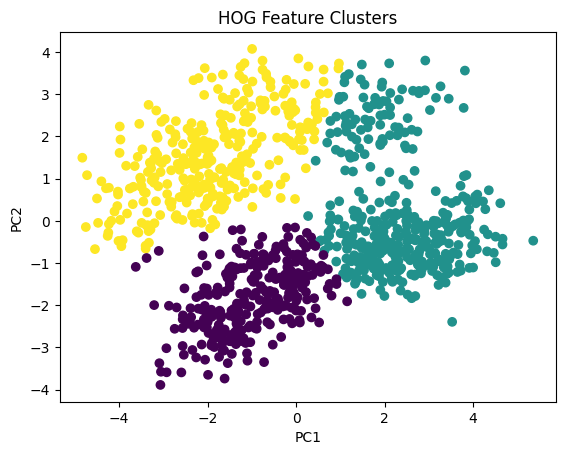

In [4]:
import os
import cv2
import numpy as np
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from skimage.feature import hog

# Define HOG parameters
orientations = 9
pixels_per_cell = (8, 8)
cells_per_block = (3, 3)
visualize = False
transform_sqrt = False
feature_vector = True

# Define directory containing images
directory = 'PlantVillage/Potato___Early_blight'

# Initialize empty list to store feature vectors
feature_vectors = []

# Loop over all images in directory
for filename in os.listdir(directory):
    if filename.endswith('.JPG'):
        # Load image
        img = cv2.imread(os.path.join(directory, filename))

        # Convert image to grayscale
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

        # Extract HOG features
        features = hog(gray, orientations=orientations,
                       pixels_per_cell=pixels_per_cell,
                       cells_per_block=cells_per_block,
                       visualize=visualize,
                       transform_sqrt=transform_sqrt,
                       feature_vector=feature_vector)

        # Add feature vector to list
        feature_vectors.append(features)

# Convert feature vector list to numpy array
feature_vectors = np.array(feature_vectors)

# Perform PCA to reduce the dimensionality of the feature vectors
pca = PCA(n_components=2)
feature_vectors_pca = pca.fit_transform(feature_vectors)

# Perform K-Means clustering on the PCA-transformed feature vectors
kmeans = KMeans(n_clusters=3)
clusters = kmeans.fit_predict(feature_vectors_pca)

# Plot the clusters using different colors
plt.scatter(feature_vectors_pca[:, 0], feature_vectors_pca[:, 1], c=clusters)
plt.title("HOG Feature Clusters")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()


The output of the above code shows a scatter plot of the HOG features of images in the "Potato__Early_blight" dataset, where each point in the plot represents an image. The plot is created using Principal Component Analysis (PCA) to reduce the dimensionality of the feature vectors from the original high-dimensional space to a 2D space, where the x-axis represents the first principal component (PC1) and the y-axis represents the second principal component (PC2).

The three clusters that are visible in the plot suggest that there are three distinct groups of images in the dataset, which may be associated with different stages of the disease or different types of blight. By analyzing the images in each cluster, it may be possible to identify patterns or features that are characteristic of each group, which could be used to develop more accurate and targeted diagnostic or treatment strategies.



This code performs K-Means clustering on the HOG feature vectors of a set of images of potatoes with early blight disease, and then plots the resulting clusters using PCA to reduce the dimensionality of the feature vectors.

First, the code reads in all images in the specified directory, converts them to grayscale, and extracts the HOG features using the skimage.feature.hog() function. The resulting feature vectors are stored in a list.

Then, the list of feature vectors is converted to a numpy array and PCA is used to reduce the dimensionality of the feature vectors to 2 components. The resulting PCA-transformed feature vectors are stored in a new array.

Finally, K-Means clustering is performed on the PCA-transformed feature vectors with 3 clusters, and the resulting cluster assignments are plotted on a scatter plot using the PCA components as the x and y axes.

This allows us to visualize how the HOG features of the potato images with early blight disease cluster together, and could potentially be useful for identifying patterns in the data.

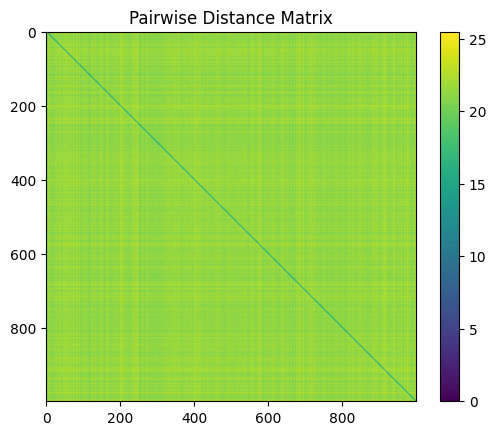

In [6]:
from scipy.spatial.distance import pdist, squareform
# Compute pairwise distances between feature vectors
dist_matrix = squareform(pdist(feature_vectors))

# Visualize the distance matrix as a heatmap
plt.imshow(dist_matrix, cmap='viridis')
plt.title('Pairwise Distance Matrix')
plt.colorbar()
plt.show()

The code you posted computes pairwise distances between feature vectors using pdist function from scipy.spatial.distance. Then it converts the resulting distance matrix to a symmetric matrix using squareform function. Finally, it visualizes the resulting matrix as a heatmap using imshow function from matplotlib.pyplot. The heatmap is colored according to the values in the matrix and is annotated with a colorbar.

Since I have a large dataset, it can be challenging to visualize the distance matrix or dendrogram in a meaningful way. One solution is to use hierarchical clustering to group similar images together based on their HOG features.

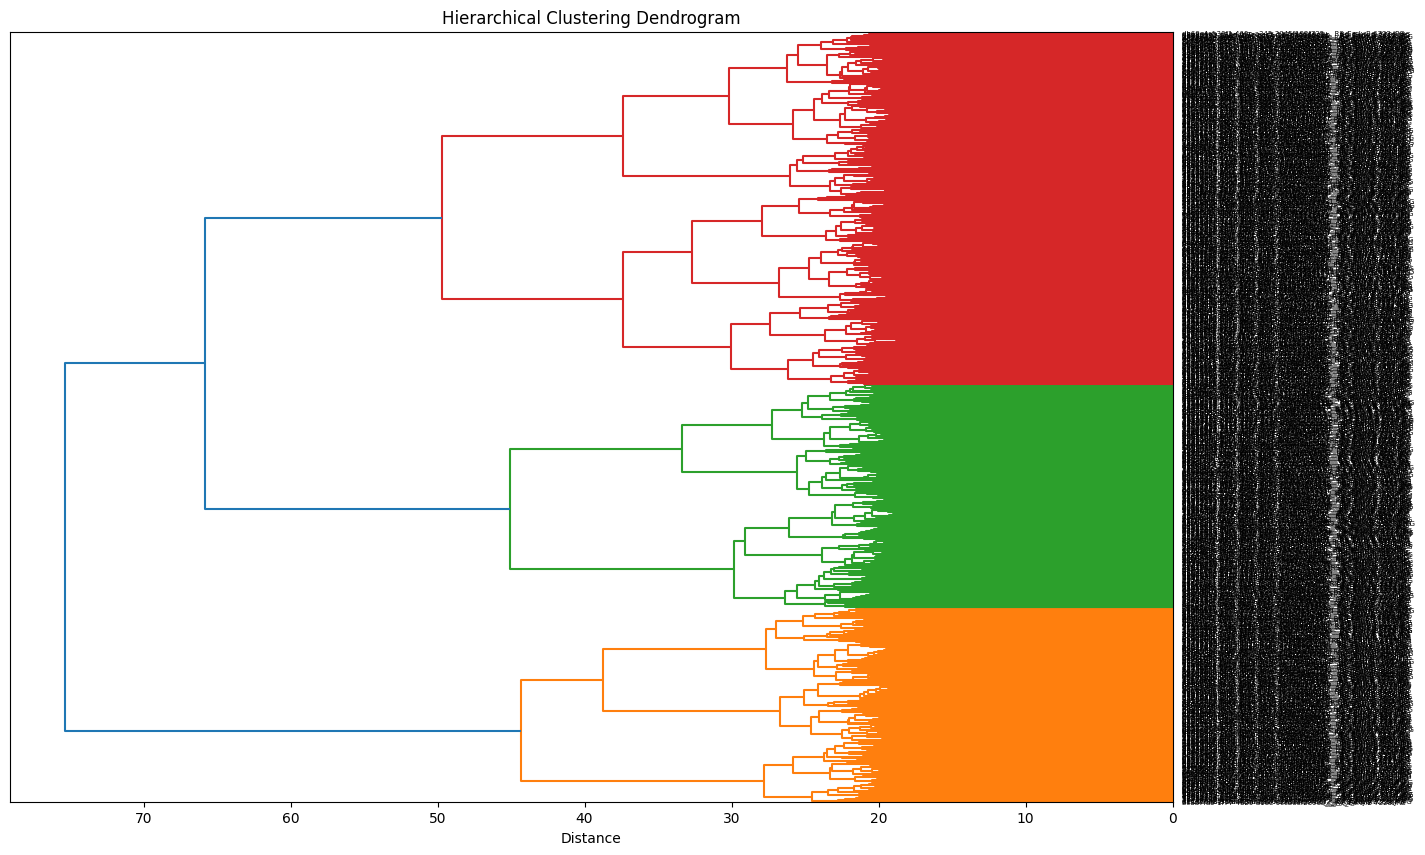

In [7]:
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import linkage, dendrogram
from skimage.feature import hog
# Convert feature vector list to numpy array
feature_vectors = np.array(feature_vectors)

# Compute pairwise distances between feature vectors
distances = pdist(feature_vectors, metric='euclidean')

# Perform hierarchical clustering
linkage_matrix = linkage(distances, method='ward')

# Plot dendrogram
fig, ax = plt.subplots(figsize=(15, 10))
dendrogram(linkage_matrix, labels=os.listdir(directory), orientation='left')
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Distance")
plt.show()

In this code, we use pdist from scipy.spatial.distance to compute the pairwise distances between feature vectors using the Euclidean distance metric. We then use linkage from scipy.cluster.hierarchy to perform hierarchical clustering using the Ward method, which minimizes the variance of the clusters being merged at each step. Finally, we use dendrogram from scipy.cluster.hierarchy to plot the dendrogram.

The resulting dendrogram shows how the images are clustered based on their HOG features. Images that are more similar in terms of their HOG features will be grouped together at lower distances in the dendrogram. You can use this information to identify clusters of similar images and explore the patterns and differences within and between clusters.

This code performs hierarchical clustering on the feature vectors extracted using HOG from a directory of images.

First, the feature vectors are converted into a numpy array, and then pairwise distances between them are computed using the Euclidean distance metric. Hierarchical clustering is then performed on the distance matrix using the Ward method. Finally, a dendrogram is plotted using the labels of the images in the directory on the y-axis and the distance on the x-axis. This dendrogram shows the hierarchical relationships between the images based on their HOG feature vectors.

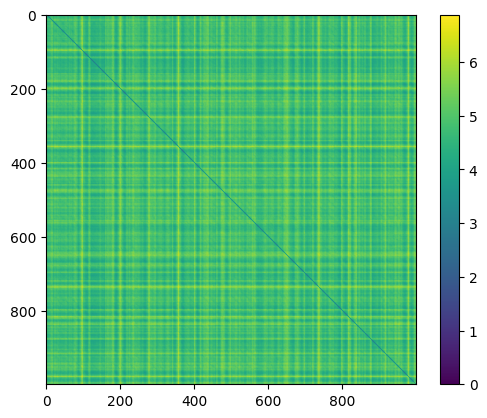

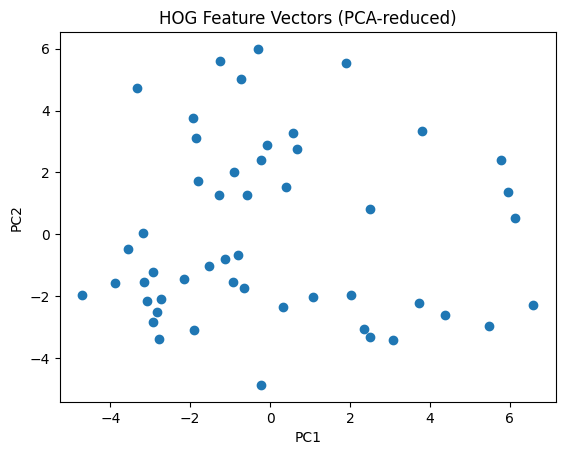

In [14]:
import os
import cv2
import numpy as np
from scipy.spatial.distance import pdist, squareform
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import random

# Define HOG parameters
orientations = 9
pixels_per_cell = (8, 8)
cells_per_block = (3, 3)
visualize = False
transform_sqrt = False
feature_vector = True

import os

# Define the path to the image directory
image_dir = "PlantVillage/Potato___Early_blight"

# Get the list of image file names in the directory
image_names = os.listdir(image_dir)

# Create a list of image paths by joining the image directory path and file names
image_paths = [os.path.join(image_dir, name) for name in image_names]


# Get list of all image filenames
all_images = os.listdir(directory)

# Randomly select 100 image filenames
selected_images = random.sample(all_images, 50)

# Initialize empty list to store feature vectors
feature_vectors = []

# Loop over selected images
for filename in selected_images:
    if filename.endswith('.JPG'):
        # Load image
        img = cv2.imread(os.path.join(directory, filename))

        # Convert image to grayscale
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

        # Extract HOG features
        features = hog(gray, orientations=orientations,
                       pixels_per_cell=pixels_per_cell,
                       cells_per_block=cells_per_block,
                       visualize=visualize,
                       transform_sqrt=transform_sqrt,
                       feature_vector=feature_vector)

        # Add feature vector to list
        feature_vectors.append(features)

# Reshape feature_vectors array to be 2-dimensional
feature_vectors_2d = np.array(feature_vectors).reshape(len(image_paths), -1)


# Compute pairwise distances between feature vectors
distances = pdist(feature_vectors_2d)

# Convert distances to squareform distance matrix
distance_matrix = squareform(distances)


# Visualize distance matrix as heatmap
plt.imshow(distance_matrix, cmap='viridis')
plt.colorbar()
plt.show()

# Apply PCA to feature vectors
pca = PCA(n_components=2)
pca.fit(feature_vectors)
reduced = pca.transform(feature_vectors)

# Plot reduced feature vectors
plt.scatter(reduced[:, 0], reduced[:, 1])
plt.title("HOG Feature Vectors (PCA-reduced)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()


This above code let's me change the number of images that We can input randomly, so gives a better way to play with the data.